In [1]:
from mantle_utils.alg.raster import Raster
from rasterio.windows import Window
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
stack_df = pd.read_pickle('./namelist/s2_08.pkl')
stack_df

,stack_artefact_name,source_artefact_name,source_run_name,source_workflow_name,start_datetime,end_datetime,raster_path
3918,3918,B08,nirlipta_30UXB,s2-generate_composites,2019-01-02,2019-01-02,s3://mantlelabs-eu-workflows/s2-generate_compo...
3919,3919,B08,nirlipta_30UXB,s2-generate_composites,2019-01-04,2019-01-04,s3://mantlelabs-eu-workflows/s2-generate_compo...
3920,3920,B08,nirlipta_30UXB,s2-generate_composites,2019-01-05,2019-01-05,s3://mantlelabs-eu-workflows/s2-generate_compo...
3921,3921,B08,nirlipta_30UXB,s2-generate_composites,2019-01-07,2019-01-07,s3://mantlelabs-eu-workflows/s2-generate_compo...
3922,3922,B08,nirlipta_30UXB,s2-generate_composites,2019-01-09,2019-01-09,s3://mantlelabs-eu-workflows/s2-generate_compo...
...,...,...,...,...,...,...,...
4566,4566,B08,nirlipta_30UXB,s2-generate_composites,2021-12-24,2021-12-24,s3://mantlelabs-eu-workflows/s2-generate_compo...
4567,4567,B08,nirlipta_30UXB,s2-generate_composites,2021-12-25,2021-12-25,s3://mantlelabs-eu-workflows/s2-generate_compo...
4568,4568,B08,nirlipta_30UXB,s2-generate_composites,2021-12-27,2021-12-27,s3://mantlelabs-eu-workflows/s2-generate_compo...
4569,4569,B08,nirlipta_30UXB,s2-generate_composites,2021-12-29,2021-12-29,s3://mantlelabs-eu-workflows/s2-generate_compo...


<class 'pandas.core.series.Series'>


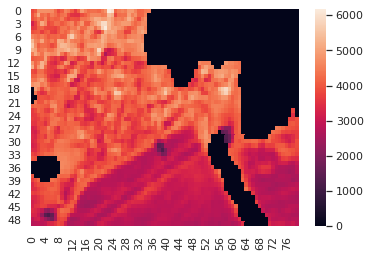

In [104]:
#start = '2019-05-01'
end = '2019-07-10'
target = stack_df[stack_df['start_datetime'] >= end]
target = target.iloc[3]
size = [80,50]
window = Window(col_off=100, row_off=200, width=size[0], height=size[1])
print(type(target))
target = Raster((target['raster_path']), window=window)
target = target.array.reshape(50,80)
sns.heatmap(target)

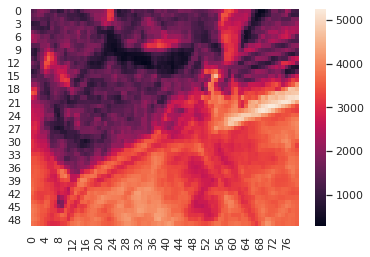

In [114]:
stack = stack_df[stack_df['start_datetime'] < np.datetime64(end)]
sorted_datetimes = sorted(list(set(
    stack['start_datetime'].values)), reverse = True)
monkey = stack.iloc[9]
monkey = Raster((monkey['raster_path']), window=window)
monkey = monkey.array.reshape(50,80)
sns.heatmap(monkey)

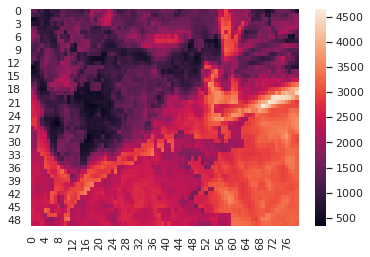

In [115]:
pred = np.load('./s2b08/2019-04-26.npy')
sns.heatmap(pred)

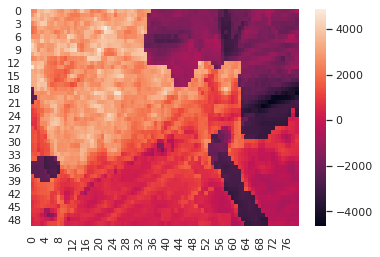

In [116]:
sns.heatmap(target-pred)

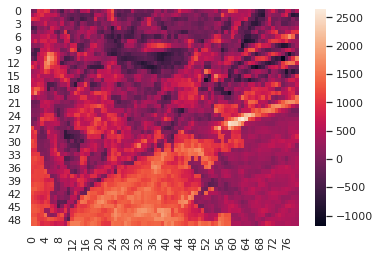

In [99]:
sns.heatmap(monkey-pred)

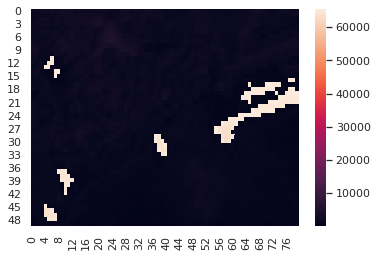

In [75]:
sns.heatmap(target-monkey)

In [1]:
from mantle_utils.alg.raster import Raster
from rasterio.windows import Window
import numpy as np
import pandas as pd
stack_df = pd.read_pickle('./namelist/s1_alltime.pkl')
sorted_datetimes_asc = pd.read_pickle('./namelist/s1_dates_a.pkl')
sorted_datetimes_dsc = pd.read_pickle('./namelist/s1_dates_d.pkl')
end = '2019-04-26'

In [2]:
sorted_datetimes_asc.columns =['start_time']
sorted_datetimes_asc['start_time'] = pd.to_datetime(sorted_datetimes_asc['start_time'])
sorted_datetimes_dsc.columns =['start_time']
sorted_datetimes_dsc['start_time'] = pd.to_datetime(sorted_datetimes_dsc['start_time'])

In [3]:
sorted_datetimes_a = sorted_datetimes_asc[sorted_datetimes_asc['start_time'] >= end]
sorted_datetimes_d = sorted_datetimes_dsc[sorted_datetimes_dsc['start_time'] >= end]

/tmp/ipykernel_19528/3042318675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_datetimes_d = sorted_datetimes_asc[sorted_datetimes_dsc['start_time'] >= end]


In [80]:
print(pd.to_datetime(target.iloc[0]['start_datetime']))
print(sorted_datetimes_a.head())
target_asc = target.iloc[0]
#stack_df = pd.DataFrame(stack_df)
size = [80,50]
window = Window(col_off=100, row_off=200, width=size[0], height=size[1])
target_asc = Raster((target_asc['raster_path']), window=window)
target_asc = target_asc.array.reshape(50,80)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [31]:
target_asc

array([[146, 148, 150, ..., 140, 140, 138],
       [147, 148, 150, ..., 140, 138, 138],
       [147, 148, 150, ..., 139, 138, 138],
       ...,
       [153, 152, 152, ..., 156, 156, 156],
       [152, 152, 152, ..., 157, 156, 156],
       [152, 152, 150, ..., 156, 156, 156]], dtype=uint8)

In [33]:
sorted_datetimes_dsc = pd.read_pickle('./namelist/s1_dates_d.pkl')
sorted_datetimes_dsc.columns =['start_time']
sorted_datetimes_dsc['start_time'] = pd.to_datetime(sorted_datetimes_dsc['start_time'])
sorted_datetimes_d = sorted_datetimes_dsc[sorted_datetimes_dsc['start_time'] >= end]
print(pd.to_datetime(target.iloc[2]['start_datetime']))
print(sorted_datetimes_d.head())
target_dsc = target.iloc[0]
#stack_df = pd.DataFrame(stack_df)
size = [80,50]
window = Window(col_off=100, row_off=200, width=size[0], height=size[1])
target_dsc = Raster((target_dsc['raster_path']), window=window)
target_dsc = target_dsc.array.reshape(50,80)

2019-08-03 00:00:00
    start_time
103 2019-08-03
104 2019-08-04
105 2019-08-05
106 2019-08-09
107 2019-08-10


In [34]:
target_dsc

array([[146, 148, 150, ..., 140, 140, 138],
       [147, 148, 150, ..., 140, 138, 138],
       [147, 148, 150, ..., 139, 138, 138],
       ...,
       [153, 152, 152, ..., 156, 156, 156],
       [152, 152, 152, ..., 157, 156, 156],
       [152, 152, 150, ..., 156, 156, 156]], dtype=uint8)

In [26]:
target_asc = target.iloc[0]
#stack_df = pd.DataFrame(stack_df)
size = [80,50]
window = Window(col_off=100, row_off=200, width=size[0], height=size[1])
target_asc = Raster((target_asc['raster_path']), window=window)
target_asc = target_asc.array.reshape(50,80)

In [27]:
target_asc

array([[146, 148, 150, ..., 140, 140, 138],
       [147, 148, 150, ..., 140, 138, 138],
       [147, 148, 150, ..., 139, 138, 138],
       ...,
       [153, 152, 152, ..., 156, 156, 156],
       [152, 152, 152, ..., 157, 156, 156],
       [152, 152, 150, ..., 156, 156, 156]], dtype=uint8)

In [42]:
#stack_df['start_datetime'] = pd.to_datetime(stack_df['start_datetime'])
stack_df = stack_df[np.logical_and(stack_df['start_datetime'] >= np.datetime64(start), stack_df['start_datetime'] < np.datetime64(end))]
sorted_datetimes = sorted(list(set(
    stack_df['start_datetime'].values)), reverse = True)
monkey = stack_df.iloc[1]
monkey = Raster((monkey['raster_path']), window=window)
monkey = monkey.array.reshape(50,80)

In [43]:
monkey

array([[152, 151, 153, ..., 150, 149, 150],
       [151, 149, 151, ..., 149, 149, 149],
       [149, 147, 150, ..., 149, 149, 149],
       ...,
       [120, 120, 121, ..., 120, 121, 122],
       [121, 121, 122, ..., 119, 121, 122],
       [122, 122, 122, ..., 120, 121, 122]], dtype=uint8)

In [44]:
pred_asc = np.load('./namelist/prediction.npy')
pred_asc

array([[151.9876874 , 152.37514048, 152.92193296, ..., 150.06418935,
        149.20191846, 149.14138383],
       [151.3564351 , 151.89174856, 152.43223233, ..., 150.49344062,
        149.71578893, 149.04734363],
       [150.90246228, 151.12057613, 151.71317847, ..., 151.30117404,
        150.23979863, 149.54421295],
       ...,
       [113.19482444, 114.88480458, 117.06396239, ..., 111.73045597,
        111.11958449, 110.72378365],
       [113.8376587 , 115.187865  , 116.93115723, ..., 111.43210811,
        110.96693363, 111.10742082],
       [114.86869685, 115.82930437, 116.89904146, ..., 111.69568159,
        111.16117297, 111.43439399]])

In [37]:
pred_dsc = np.load('./namelist/prediction_dsc.npy')
pred_dsc

array([[204.79237261, 202.51229799, 204.18969299, ..., 205.97993598,
        206.13362507, 206.2429726 ],
       [205.15285601, 204.77479556, 204.60150005, ..., 206.65565049,
        206.38788524, 206.56939887],
       [205.56447195, 203.23886289, 205.03504974, ..., 206.94751062,
        206.39814932, 206.28950619],
       ...,
       [194.39507064, 195.41119318, 197.0980496 , ..., 197.87805151,
        198.04961602, 196.37340845],
       [195.67395988, 196.48581251, 197.11437141, ..., 197.89867182,
        198.42726048, 198.20648423],
       [196.36206053, 196.88220289, 197.62457462, ..., 195.1533625 ,
        198.49714888, 196.65231677]])

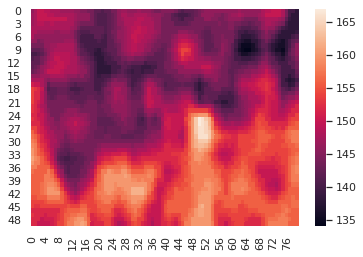

In [40]:
import seaborn as sns; sns.set_theme()
sns.heatmap(target_dsc)

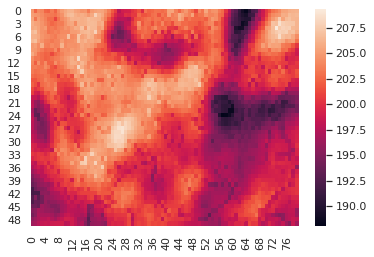

In [41]:
sns.heatmap(pred_dsc)

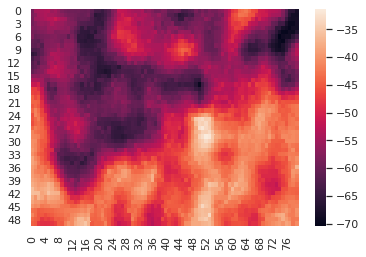

In [42]:
err = target_dsc - pred_dsc
sns.heatmap(err)

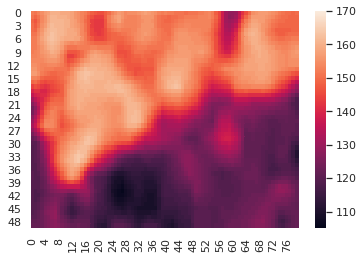

In [51]:
sns.heatmap(monkey,vmin=105, vmax=170)

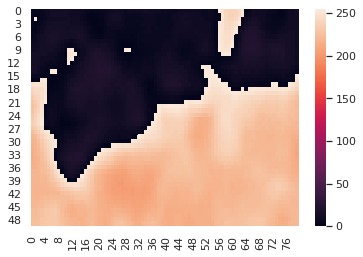

In [53]:
err_mon = monkey - target
sns.heatmap(err_mon)

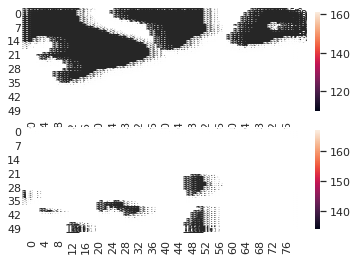